### **Lectura del data file**

In [1]:
import pandas as pd  # <--- Para leer el csv
from sklearn.model_selection import train_test_split
# Load Test file (csv)
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/intent_dataset.csv')

Mounted at /content/drive


In [2]:
# Mostrar la distribución de clases en los conjuntos de datos
def show_class_distribution(data, name):
    print(f"\nDistribución de clases en el conjunto de {name}:")
    print(data["intent"].value_counts())

show_class_distribution(df, "dataset")


Distribución de clases en el conjunto de dataset:
intent
add       400
remove    400
view      400
clear     400
Name: count, dtype: int64


### **Palabras más frecuentes**


🔹 Palabras más frecuentes para intención 'add':
by              337
add             330
to              111
my              100
please          71
you             70
playlist.       54
the             50
include         49
could           31

🔹 Palabras más frecuentes para intención 'remove':
by              344
from            236
the             213
my              189
remove          188
playlist.       131
delete          103
take            96
off             87
please          87

🔹 Palabras más frecuentes para intención 'view':
my              299
the             224
me              189
show            159
songs           140
can             124
in              124
i               117
playlist.       101
you             94

🔹 Palabras más frecuentes para intención 'clear':
my              249
clear           188
the             159
all             155
playlist        145
from            128
playlist.       113
music           80
delete          66
in              65


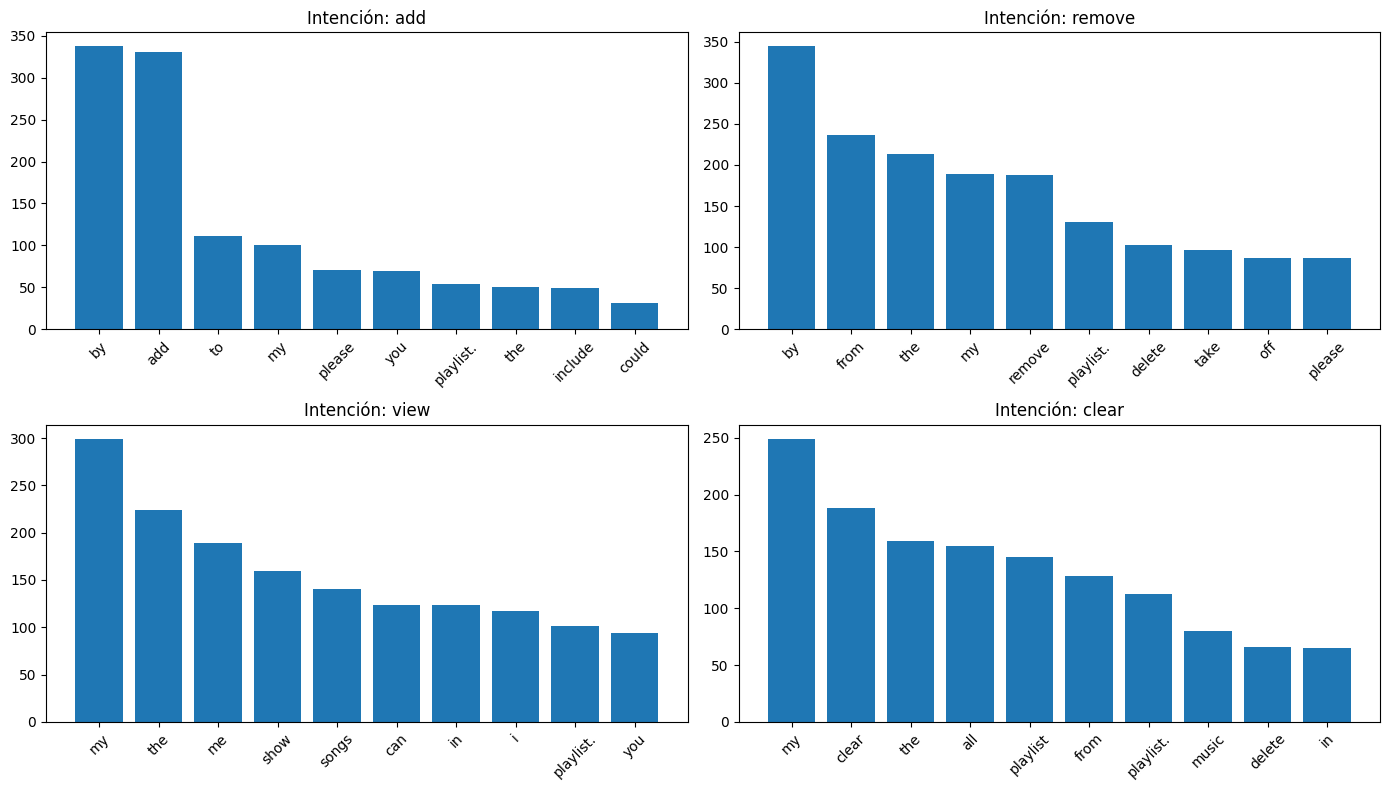

In [3]:
from collections import Counter
import matplotlib.pyplot as plt

# Asegurarse de que el texto esté en string
df['text'] = df['text'].astype(str)

# Contador de palabras por clase
label_word_counts = {}

for label in df['intent'].unique():
    texts = df[df['intent'] == label]['text']
    words = [word.lower() for sentence in texts for word in sentence.split()]
    word_freq = Counter(words)
    label_word_counts[label] = word_freq.most_common(10)

# Mostrar resultados por consola
for label, words in label_word_counts.items():
    print(f"\n🔹 Palabras más frecuentes para intención '{label}':")
    for word, count in words:
        print(f"{word:<15} {count}")

# Gráfico de barras por etiqueta
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
axs = axs.flatten()

for idx, (label, words) in enumerate(label_word_counts.items()):
    words_, counts = zip(*words)
    axs[idx].bar(words_, counts)
    axs[idx].set_title(f"Intención: {label}")
    axs[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### **División del conjunto de datos en test, entrenamiento y evaluación**

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["intent"], random_state=42)

train_df, eval_df = train_test_split(train_df, test_size=0.15, stratify=train_df["intent"], random_state=42)

drive.mount('/content/drive')

# Guardado o sobrescritura de datos
train_df.to_csv("/content/drive/My Drive/Colab Notebooks/data/train.csv", index=False, mode='w')
test_df.to_csv("/content/drive/My Drive/Colab Notebooks/data/test.csv", index=False, mode='w')
eval_df.to_csv("/content/drive/My Drive/Colab Notebooks/data/eval.csv", index=False, mode='w')

print("Total ejemplos:", len(df))
print("Entrenamiento:", len(train_df))
show_class_distribution(train_df, "entrenamiento")
print("Test:", len(test_df))
show_class_distribution(test_df, "test")
print("Evaluacion:", len(eval_df))
show_class_distribution(eval_df, "evaluacion")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total ejemplos: 1600
Entrenamiento: 1088

Distribución de clases en el conjunto de entrenamiento:
intent
clear     272
remove    272
add       272
view      272
Name: count, dtype: int64
Test: 320

Distribución de clases en el conjunto de test:
intent
add       80
view      80
clear     80
remove    80
Name: count, dtype: int64
Evaluacion: 192

Distribución de clases en el conjunto de evaluacion:
intent
add       48
clear     48
remove    48
view      48
Name: count, dtype: int64
